In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
train_dir = '/content/drive/MyDrive/train'
test_dir = '/content/drive/MyDrive/test'

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/cat')))
print(len(os.listdir('/content/drive/MyDrive/train/rabbit')))
print(len(os.listdir('/content/drive/MyDrive/test/cat')))
print(len(os.listdir('/content/drive/MyDrive/test/rabbit')))

800
800
10
5


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1280 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
40/40 [==============================] - 218s 5s/step - loss: 0.1969 - accuracy: 0.9258 - val_loss: 0.3561 - val_accuracy: 0.8750
Epoch 2/30
40/40 [==============================] - 211s 5s/step - loss: 0.0976 - accuracy: 0.9680 - val_loss: 0.3947 - val_accuracy: 0.9031
Epoch 3/30
40/40 [==============================] - 213s 5s/step - loss: 0.0539 - accuracy: 0.9844 - val_loss: 0.3909 - val_accuracy: 0.8531
Epoch 4/30
40/40 [==============================] - 210s 5s/step - loss: 0.0605 - accuracy: 0.9867 - val_loss: 0.4900 - val_accuracy: 0.8750
Epoch 5/30
40/40 [==============================] - 213s 5s/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.5401 - val_accuracy: 0.8906
Epoch 6/30
40/40 [==============================] - 211s 5s/step - loss: 0.0265 - accuracy: 0.9922 - val_loss: 0.6123 - val_accuracy: 0.8813
Epoch 7/30
40/40 [==============================] - 212s 5s/step - loss: 0.0111 - accuracy: 0.9961 - val_loss: 0.4665 - val_accuracy: 0.9000
Epoch 8/30
40

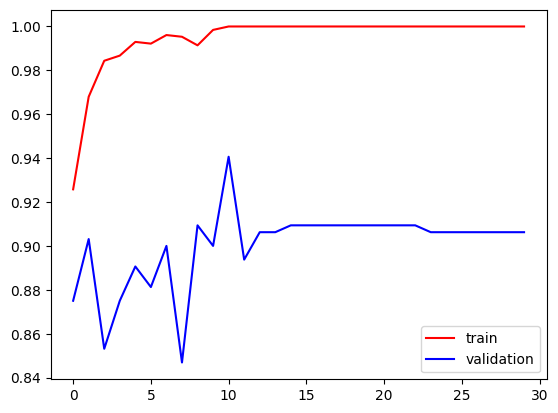

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

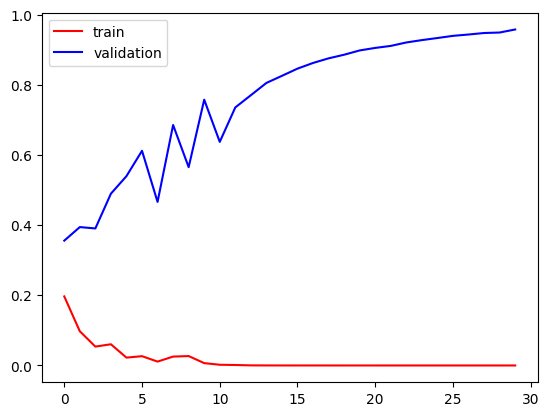

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 15 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)
print(predictions)

1/1 [==============================] - 1s 773ms/step
[[1.4019625e-05]
 [9.4805710e-06]
 [9.9998307e-01]
 [9.9865496e-01]
 [1.0000000e+00]
 [2.0897270e-12]
 [1.3487167e-09]
 [9.9999976e-01]
 [1.7717576e-07]
 [1.6598254e-14]
 [9.5088738e-01]
 [5.5453851e-13]
 [1.6822644e-13]
 [9.9516827e-01]
 [4.9562434e-09]]


In [ ]:
len(predictions)

15

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)
cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[6 4]
 [3 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.33      0.40      0.36         5

    accuracy                           0.53        15
   macro avg       0.50      0.50      0.50        15
weighted avg       0.56      0.53      0.54        15



In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 2s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
40/40 [==============================] - 494s 12s/step - loss: 2.1684 - accuracy: 0.5195 - val_loss: 1.4443 - val_accuracy: 0.5000
Epoch 2/3
40/40 [==============================] - 414s 10s/step - loss: 0.7783 - accuracy: 0.5914 - val_loss: 0.9848 - val_accuracy: 0.5125
Epoch 3/3
40/40 [==============================] - 474s 12s/step - loss: 0.6062 - accuracy: 0.6703 - val_loss: 0.8750 - val_accuracy: 0.5156


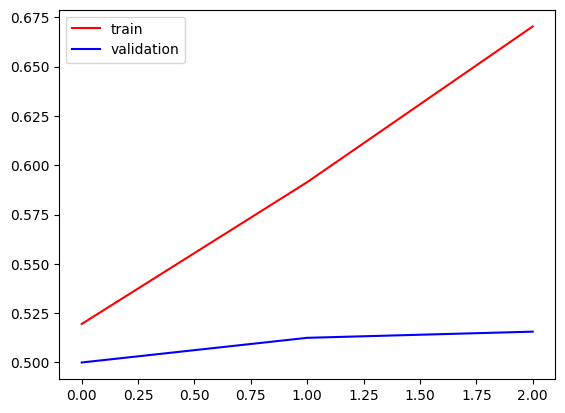

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

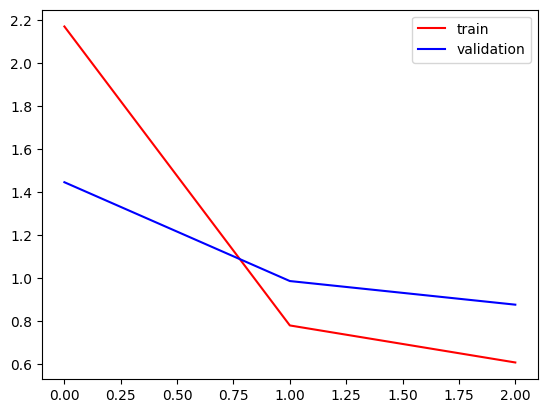

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 15 images belonging to 2 classes.


In [ ]:
predictions = resnet_model.predict(test_data)
print(predictions)

1/1 [==============================] - 4s 4s/step
[[0.8155925 ]
 [0.96689284]
 [0.9072927 ]
 [0.7374322 ]
 [0.69144785]
 [0.7859844 ]
 [0.936957  ]
 [0.8081409 ]
 [0.93518746]
 [0.99066406]
 [0.5781075 ]
 [0.92806166]
 [0.75653076]
 [0.85607594]
 [0.8162706 ]]


In [ ]:
len(predictions)

15

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 0 10]
 [ 0  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.33      1.00      0.50         5

    accuracy                           0.33        15
   macro avg       0.17      0.50      0.25        15
weighted avg       0.11      0.33      0.17        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
